# Assignment: Decision Trees and Random Forests

## Business Understanding

The objectives of this assignment are:
- to learn to use decision trees to build a transparent, human-readable predictive model.
- to learn to use random forests for improved predictive performance.


In [14]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import confusion_matrix


# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
data = phishing_websites.data.original



##  Data Understanding

In [15]:
data.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Data Preparation

In [16]:
# INPUT FEATURES
X = data.drop(['result'], axis = 1)

#TARGET FESATURES
y = data['result'].astype('category')

## Modeling

(8291, 30) (2764, 30) (8291,) (2764,)


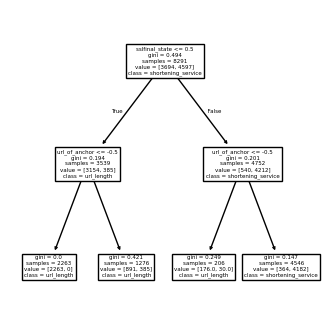

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)# extract test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = DecisionTreeClassifier(max_depth=2, random_state=20)
model.fit(X_train, y_train)

fig = plt.figure(figsize = (4, 4))
plot_tree(model, feature_names = X.keys(), class_names = ['url_length', 'shortening_service', 'prefix_suffix', 'https_token', 'abnormal_url'])
plt.show()




## Evaluation

In [18]:

preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[1095,  109],
       [ 148, 1412]])

## Deployment